In [13]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [14]:
k, a, r, γ, j = sym.symbols('k, a, r, γ, j')

djdt = (r * j) * ( (1 - (j/k))) * (j - a) - (γ * j)
sym.solve(djdt, [j]) # Puntos de equilibrio

[0,
 a/2 + k/2 - sqrt(r*(a**2*r - 2*a*k*r + k**2*r - 4*k*γ))/(2*r),
 a/2 + k/2 + sqrt(r*(a**2*r - 2*a*k*r + k**2*r - 4*k*γ))/(2*r)]

In [15]:
# Parámetros
r = 0.1 # 1/año
k = 100 # Capacidad de carga de jaguares.
a = 30   # Umbral de jaguares.
γ = 2   # muertes/año.

# Time
jmax = 150  # Número máximo de jaguares.
nx = 100   # Número de puntos.

# Número de individuos.
J0 = 51    #CONDICIONES INICIALES
eqs = [0, a/2 + k/2 - np.sqrt(r*(a**2*r - 2*a*k*r + k**2*r - 4*k*γ))/(2*r), a/2 + k/2 + np.sqrt(r*(a**2*r - 2*a*k*r + k**2*r - 4*k*γ))/(2*r)]
eqs

/tmp/ipykernel_160/2955884660.py:13: RuntimeWarning: invalid value encountered in sqrt
  eqs = [0, a/2 + k/2 - np.sqrt(r*(a**2*r - 2*a*k*r + k**2*r - 4*k*γ))/(2*r), a/2 + k/2 + np.sqrt(r*(a**2*r - 2*a*k*r + k**2*r - 4*k*γ))/(2*r)]


[0, nan, nan]

Text(0.5, 1.0, 'Población de jaguares\nUmbral: 30')

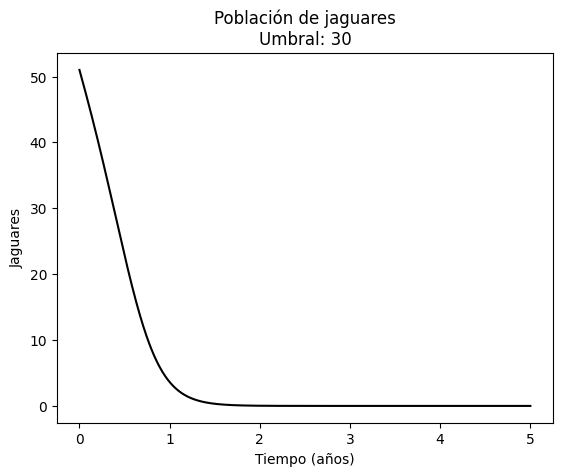

In [16]:
def sys(z,t):
    [J] = z
    dJdt = (r * J) * ( (1 - (J/k))) * (J - a) - (γ * J)
    return np.array([dJdt])

t = np.linspace(0,5,1000)
sol = odeint(sys,J0,t)  #Solución de ecuación
sol1 = sol[:,0]

plt.plot(t, sol1, color='black', label='Jaguares')
plt.xlabel('Tiempo (años)')
plt.ylabel('Jaguares')
plt.title(f'Población de jaguares\nUmbral: {a}')

In [17]:
def generacion(j):
    return (j*r*(1 - (j/k)))*(j - a)

def degradacion(j):
    return γ * j

def model(x):
    return generacion(x) - degradacion(x)

j = np.linspace(0, jmax, nx)

In [18]:
# Nulclinas
X = np.linspace(-jmax, jmax, nx)
Y = np.linspace(-jmax, jmax, nx)
X, Y = np.meshgrid(X, Y)
u = model(X)            # X nulclina
v = model(Y)            # Y nulclina

n = np.sqrt(u**2 + v**2)
U = u/n
V = v/n

Text(0, 0.5, '$\\frac{dJ}{dt}$')

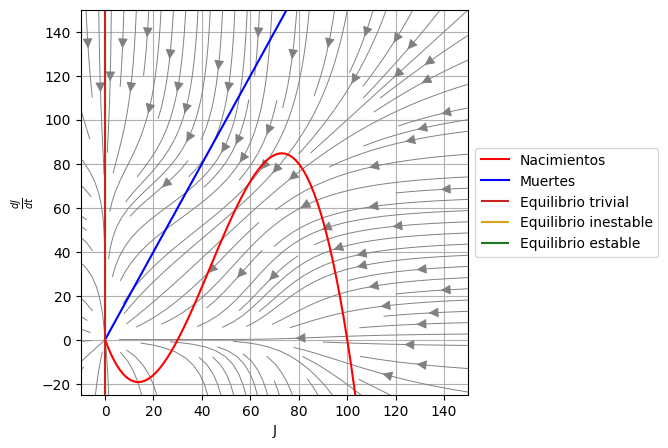

In [19]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.streamplot(X,Y,U,V, color='grey', density=2, linewidth=0.7, arrowsize=1.5)
# plt.quiver(X,Y,U,V,lw=1)
plt.plot(j, generacion(j), color='red', label='Nacimientos')
plt.plot(j, degradacion(j), color='blue', label='Muertes')
plt.vlines(eqs[0], -jmax, jmax, color='#C92424', label='Equilibrio trivial')
plt.vlines(eqs[1], -jmax, jmax, color='#D8A218', label='Equilibrio inestable')
plt.vlines(eqs[2], -jmax, jmax, color='#1C7B16', label='Equilibrio estable')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.xlim(-10, 150)
plt.ylim(-25, 150)
plt.xlabel('J')
plt.ylabel(r'$\frac{dJ}{dt}$')

/tmp/ipykernel_160/2516018604.py:22: RuntimeWarning: invalid value encountered in divide
  U = u/n
/tmp/ipykernel_160/2516018604.py:23: RuntimeWarning: invalid value encountered in divide
  V = v/n
/tmp/ipykernel_160/2516018604.py:27: RuntimeWarning: invalid value encountered in sqrt
  eqs = [0, a/2 + k/2 - np.sqrt(r*(a**2*r - 2*a*k*r + k**2*r - 4*k*γ))/(2*r), a/2 + k/2 + np.sqrt(r*(a**2*r - 2*a*k*r + k**2*r - 4*k*γ))/(2*r)];


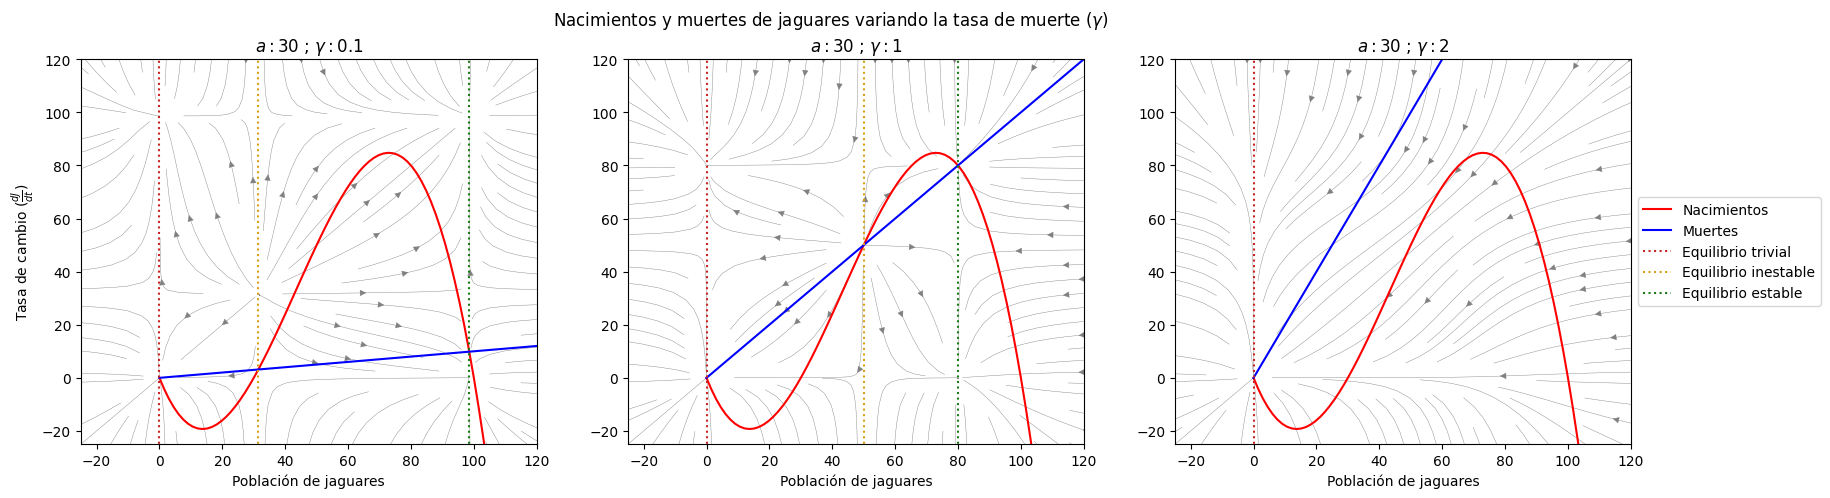

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
gamma_values = [0.1, 1, 2]

for i in range(len(gamma_values)):
    
    # ______ Parámetros ______
    
    r = 0.1 # 1/año
    k = 100 # Capacidad de carga de jaguares.
    a = 30   # Umbral de jaguares.
    γ = gamma_values[i]   # muertes/año.

    # ______ Nulclinas ______

    X = np.linspace(-jmax, jmax, nx)
    Y = np.linspace(-jmax, jmax, nx)
    X, Y = np.meshgrid(X, Y)
    u = model(X)            # X nulclina
    v = model(Y)           # Y nulclina

    n = np.sqrt(u**2 + v**2)
    U = u/n
    V = v/n
    
    # ____ Cálculo de Equilibrios ___
    
    eqs = [0, a/2 + k/2 - np.sqrt(r*(a**2*r - 2*a*k*r + k**2*r - 4*k*γ))/(2*r), a/2 + k/2 + np.sqrt(r*(a**2*r - 2*a*k*r + k**2*r - 4*k*γ))/(2*r)];
    
    # _____ Gráficos _____ 

    # 
    ax[i].streamplot(X,Y,u,v, color='grey', density=2, linewidth=0.3, arrowsize=1)
    ax[i].plot(j, generacion(j), color='red', label='Nacimientos')
    ax[i].plot(j, degradacion(j), color='blue', label='Muertes')
    #
    ax[i].vlines(eqs[0], -jmax, jmax, color='#C92424', label='Equilibrio trivial', linestyles='dotted')
    ax[i].vlines(eqs[1], -jmax, jmax, color='#D8A218', label='Equilibrio inestable', linestyles='dotted')
    ax[i].vlines(eqs[2], -jmax, jmax, color='#1C7B16', label='Equilibrio estable', linestyles='dotted')
    #
    
    ax[i].set_title(fr'$a: {a}$ ; $γ: {γ}$')

    ax[i].set_xlim(-25, 120)
    ax[i].set_ylim(-25, 120)
    
ax[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle(r'Nacimientos y muertes de jaguares variando la tasa de muerte ($γ$)')
ax[0].set_xlabel('Población de jaguares')
ax[1].set_xlabel('Población de jaguares')
ax[2].set_xlabel('Población de jaguares')
ax[0].set_ylabel(r'Tasa de cambio ($\frac{dJ}{dt}$)');

/tmp/ipykernel_160/3881694466.py:22: RuntimeWarning: invalid value encountered in divide
  U = u/n
/tmp/ipykernel_160/3881694466.py:23: RuntimeWarning: invalid value encountered in divide
  V = v/n
/tmp/ipykernel_160/3881694466.py:27: RuntimeWarning: invalid value encountered in sqrt
  eqs = [0, a/2 + k/2 - np.sqrt(r*(a**2*r - 2*a*k*r + k**2*r - 4*k*γ))/(2*r), a/2 + k/2 + np.sqrt(r*(a**2*r - 2*a*k*r + k**2*r - 4*k*γ))/(2*r)];


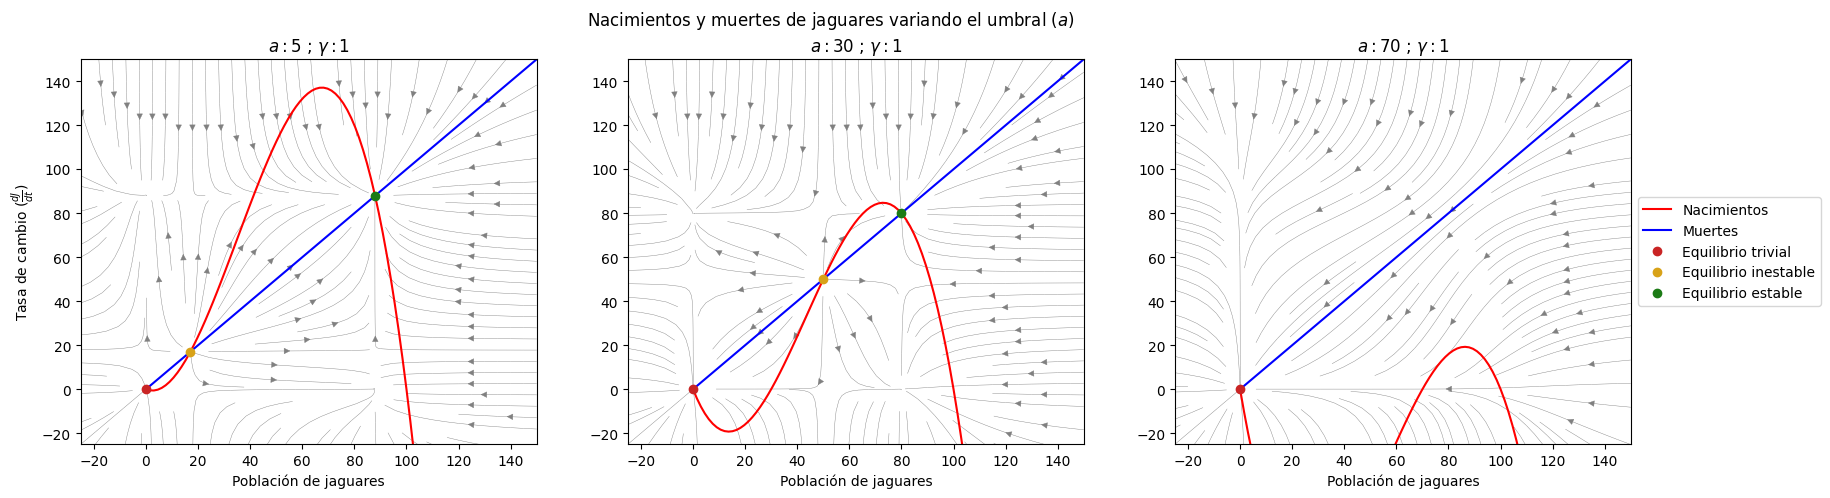

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
a_values = [5, 30, 70]

for i in range(len(a_values)):
    
    # ______ Parámetros ______
    
    r = 0.1 # 1/año
    k = 100 # Capacidad de carga de jaguares.
    a = a_values[i]   # Umbral de jaguares.
    γ = 1   # muertes/año.

    # ______ Nulclinas ______

    X = np.linspace(-jmax, jmax, nx)
    Y = np.linspace(-jmax, jmax, nx)
    X, Y = np.meshgrid(X, Y)
    u = model(X)            # X nulclina
    v = model(Y)           # Y nulclina

    n = np.sqrt(u**2 + v**2)
    U = u/n
    V = v/n
    
    # ____ Cálculo de Equilibrios ___
    
    eqs = [0, a/2 + k/2 - np.sqrt(r*(a**2*r - 2*a*k*r + k**2*r - 4*k*γ))/(2*r), a/2 + k/2 + np.sqrt(r*(a**2*r - 2*a*k*r + k**2*r - 4*k*γ))/(2*r)];
    
    # _____ Gráficos _____ 

    # 
    ax[i].streamplot(X,Y,u,v, color='grey', density=2, linewidth=0.3, arrowsize=1)
    ax[i].plot(j, generacion(j), color='red', label='Nacimientos')
    ax[i].plot(j, degradacion(j), color='blue', label='Muertes')
    #
    # ax[i].vlines(eqs[0], -jmax, jmax, color='#C92424', label='Equilibrio trivial', linestyles='dotted')
    # ax[i].vlines(eqs[1], -jmax, jmax, color='#D8A218', label='Equilibrio inestable', linestyles='dotted')
    # ax[i].vlines(eqs[2], -jmax, jmax, color='#1C7B16', label='Equilibrio estable', linestyles='dotted')
    ax[i].plot(eqs[0], model(eqs[0]), marker='o', lw=0, color='#C92424', label='Equilibrio trivial')
    ax[i].plot(eqs[1], generacion(eqs[1]), marker='o', lw=0, color='#D8A218', label='Equilibrio inestable')
    ax[i].plot(eqs[2], generacion(eqs[2]), marker='o', lw=0, color='#1C7B16', label='Equilibrio estable')
    #
    ax[i].set_title(fr'$a: {a}$ ; $γ: {γ}$')

    ax[i].set_xlim(-25, jmax)
    ax[i].set_ylim(-25, jmax)
    
ax[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle(r'Nacimientos y muertes de jaguares variando el umbral ($a$)')
ax[0].set_xlabel('Población de jaguares')
ax[1].set_xlabel('Población de jaguares')
ax[2].set_xlabel('Población de jaguares')
ax[0].set_ylabel(r'Tasa de cambio ($\frac{dJ}{dt}$)');

/tmp/ipykernel_160/148961987.py:18: RuntimeWarning: invalid value encountered in divide
  U = u/n
/tmp/ipykernel_160/148961987.py:19: RuntimeWarning: invalid value encountered in divide
  V = v/n


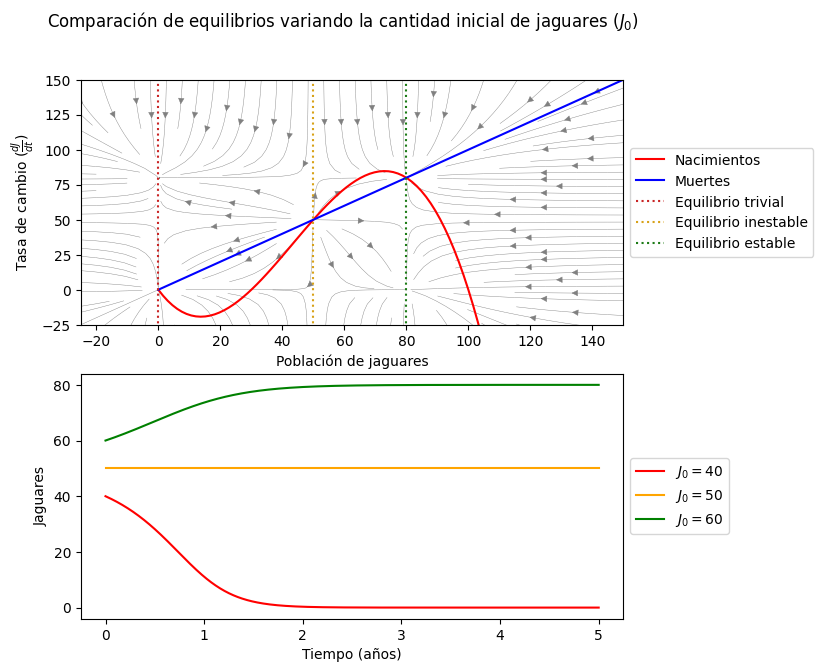

In [22]:
fig, ax = plt.subplots(2, 1, figsize=(7, 7))

# _____ Parámetros _____
r = 0.1 # 1/año
k = 100 # Capacidad de carga de jaguares.
a = 30   # Umbral de jaguares.
γ = 1   # muertes/año.

# ______ Nulclinas ______

X = np.linspace(-jmax, jmax, nx)
Y = np.linspace(-jmax, jmax, nx)
X, Y = np.meshgrid(X, Y)
u = model(X)            # X nulclina
v = model(Y)           # Y nulclina

n = np.sqrt(u**2 + v**2)
U = u/n
V = v/n
    
# ____ Cálculo de Equilibrios ___
    
eqs = [0, a/2 + k/2 - np.sqrt(r*(a**2*r - 2*a*k*r + k**2*r - 4*k*γ))/(2*r), a/2 + k/2 + np.sqrt(r*(a**2*r - 2*a*k*r + k**2*r - 4*k*γ))/(2*r)];
J_values = [40, 50, 60]
color_list = ['red', 'orange', 'green']

for i in range(len(J_values)):
    # ______ Parámetros ______
    J0 = J_values[i]

    # _____ Solución _____
    sol_j = odeint(sys,J0,t)[:,0]
    
    # _____ Gráficos _____ 
    ax[1].plot(t, sol_j, color=color_list[i], label=fr'$J_0 = {J0}$')
    
ax[1].set_xlabel('Tiempo (años)')
ax[1].set_ylabel('Jaguares')    
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.suptitle(r'Comparación de equilibrios variando la cantidad inicial de jaguares ($J_0$)')

# _____ Gráfica Nulclinas _____ 

# 
ax[0].streamplot(X,Y,u,v, color='grey', density=2, linewidth=0.3, arrowsize=1)
ax[0].plot(j, generacion(j), color='red', label='Nacimientos')
ax[0].plot(j, degradacion(j), color='blue', label='Muertes')
#
ax[0].vlines(eqs[0], -jmax, jmax, color='#C92424', label='Equilibrio trivial', linestyles='dotted')
ax[0].vlines(eqs[1], -jmax, jmax, color='#D8A218', label='Equilibrio inestable', linestyles='dotted')
ax[0].vlines(eqs[2], -jmax, jmax, color='#1C7B16', label='Equilibrio estable', linestyles='dotted')
#
# ax[0].set_title(fr'$a: {a}$ ; $γ: {γ}$')

ax[0].set_xlim(-25, jmax)
ax[0].set_ylim(-25, jmax)

ax[0].set_xlabel('Población de jaguares')
ax[0].set_ylabel(r'Tasa de cambio ($\frac{dJ}{dt}$)');
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))